# Introduction
   Water security issue has been extremely serious in the recent years due to the conflict between huge water demand, consumption and pollution because of the increasing population size around the world and the limited water resources. In order to have a deeper insight into the current global situation, we collected the relevant data about our target variables from 1988 to 2017 to conduct some research, including data visualization map about the water shortage, using dimension reduction and clustering method to make a classification among countries based on different levels of water efficiencies and consumptions, and also making the forecasting about the future water shortage values. 


# Data description
The [AQUASTAT](https://http://www.fao.org/aquastat/statistics/query/index.html) database provides the information for organizing and presenting over 180 variables and indicators on water resources and their use which include water withdrawal, wastewater, pressure on water resources, irrigation and drainage, and few components on environment and health. They can be searched and extracted, along with their metadata, for more than 200 countries and for different regions over an extensive time period (from 1960 to 2017).

In order to make the content of our project abundant and diversified, we selected relatively complete data points from the huge AQUASTAT database, which involve as many variables as possible.

 In the geograohical dimension, the chossen countries including 9 Afircan(2 northern, 7 sub-saharan), 11 American(2 northern, 4 central and 5 southern), 9 Asian(3 middle-east, 6 southern and eastern), 8 European (2 eastern, 6 western and central), 1 oceania ones.

While in the income dimension, the chosen countries including 8 high income, 15 upper middle, 6 low middle, 5 low and 2 least developed ones. 

On the other hand, to make the project more credible, we will also restrict certain attributes to ensure the unity of data points.

In our project, we focus on the dataset with 24 variables from 1988 to 2017, which involves a total of 152 data points from 38 countries which contains the least amount of miss values.


# Analysis

## Water shortage
Water crisis has been a significant problem for humanities for many years, and is even tending to wosen. According to some references, we choose total internal renewable water resources per capita (m3/inhab/yr) as an indicator of water shortage.In other words, the smaller the total internal renewable water resources per capita, the more serious the shortage of water resources.
Using the data of 38 countries from 1988 to 2017(4 years as one interval),we visualize the original as well as forecast data for the next paragraph in conjunction with time series analysis.

### Prediction of water shortage <a class="anchor" id="timeseries"></a>
 Developing a deeplearning timeseries model, the prediction of water shortage in the next four years has been attained. The prediction can be regarded as the likelihood of water shortage in a near future.

In [ ]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import hstack
my_seed = 636
np.random.seed(my_seed)
import random 
random.seed(my_seed)
import tensorflow as tf
tf.random.set_seed(my_seed)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
### define dataset
data_ts = pd.read_csv("shortage.csv")
data_ts=np.array(data_ts)
data_ts=data_ts[0:39,1:7]
ndarrayts = np.transpose(data_ts)
Datats = ndarrayts
Datats = Datats.astype('float64')

In [ ]:
# define generator
n_features = Datats.shape[1]
n_input = 2
generatorts = TimeseriesGenerator(Datats,Datats, length=n_input, batch_size=1)
# number of samples
print('Samples: %d' % len(generatorts))

Samples: 4


In [ ]:
# define model
modelts = Sequential()
modelts.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
modelts.add(Dense(38))
#modelts.compile(optimizer='adam', loss='mse')
optimizer =tf.optimizers.Adam(learning_rate=0.001)
modelts.compile(optimizer=optimizer, loss='mae')
# fit model
modelts.fit(generatorts, steps_per_epoch=1, epochs=500, verbose=0)

In [ ]:

# make a one step prediction out of sample
x_input = array([Datats[4],
Datats[5]]).reshape((1, n_input, n_features))
yhat = modelts.predict(x_input, verbose=0)
np.set_printoptions(suppress=True) 
print(yhat)

[[   111.65804   6138.356     2026.166     5794.551      903.0034
   41072.867    25636.        2404.2468   28439.19      1704.1544
   42114.92      2672.758     2316.963     1204.9337    4521.9653
    1106.7299    1561.5726    9780.953     2723.8706     325.47653
   13378.342    18092.707     3153.638      865.0727   17180.795
   65437.414    23513.854     3129.1965   26836.236     2050.0322
     704.4097  164452.89      2257.6675     999.9386    1696.202
    8203.016     3860.1362     571.7711 ]]


The prediction will be visusalized along with the former data in the next part.

### Data visualization of  water shortage
In this part, we will focus on realizing the visualization of water shortage data. During the implementation, we mainly used the pyecharts tool in python. In addition to drawing maps of water shortages in various countries, we have also added bar charts and pie charts to the same web page to help users more intuitively observe the ranking and distribution of water resources.

In [ ]:
import heapq
import pyecharts.options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Timeline, Grid, Bar, Map, Pie
import csv

In [ ]:
#define dataset
df_vis_shortage = pd.read_csv('shortage.csv')

In [ ]:
#define the elements that need to be drawn: map, histogram, and pie chart into a function "get_year_chart" at the same time.
def get_year_chart(year: int):
    map_data = df_vis_shortage[['Country',str(year)]].values.tolist()
    min_data, max_data = (
        min([d[1] for d in map_data]),
        max([d[1] for d in map_data]),
    )
    map_chart = (
        Map()
        .add(
            series_name="",
            data_pair=map_data,
            maptype="world",
            label_opts=opts.LabelOpts(is_show=False),
            is_map_symbol_show=False,
            itemstyle_opts={
                "normal": {"areaColor": "#323c48", "borderColor": "#404a59"},
                "emphasis": {
                    "label": {"show": Timeline},
                    "areaColor": "rgba(255,255,255, 0.5)",
                },
            },
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title="Water Shortage Map and Prediction from 1988",
                subtitle="Total internal renewable water resources per capita (m3/inhab/yr)",
                pos_left="center",
                pos_top="top",
                title_textstyle_opts=opts.TextStyleOpts(
                    font_size=25, color="rgba(255,255,255, 0.9)"
                ),
            ),
            tooltip_opts=opts.TooltipOpts(
                is_show=True,
                #formatter=JsCode(
                #    """function(params) {
                #    if ('value' in params.data) {
                #        return params.data.value[2] + ': ' + params.data.value[0];
                #    }
                #}"""
                #),
            ),
          visualmap_opts=opts.VisualMapOpts(
                is_calculable=True,
                dimension=0,
                pos_left="10",
                pos_top="center",
                range_text=["Abundance", "Shortage"],
                is_piecewise=True, 
                pieces=[
                    {"min":200,"max":5000,"label":"200~5000","color":"#FE2E2E"},
                    {"min":5001,"max":10000,"label":"5001~10000","color":"#F78181"},
                    {"min":10001,"max":20000,"label":"10001~20000","color":"#F7F981"},
                    {"min":20001,"max":30000,"label":"20001~30000","color":"#F5DA81"},
                    {"min":30001,"max":40000,"label":"30001~40000","color":"#E1F5A9"},
                    {"min":40001,"max":50000,"label":"40001~50000","color":"#BCF5A9"},
                    {"min":50001,"max":80000,"label":"50001~80000","color":"#A9F5E1"},
                    {"min":80001,"max":240000,"label":"80001+","color":"#A9E2F3"},
                ],
                textstyle_opts=opts.TextStyleOpts(color="#ddd"),
                min_=min_data,
                max_=max_data,
            #pos_top= "middle", 
            #pos_left="left",
            #orient="vertical"
            #split_number=10  
        ),
        )
    )
    
    map_data_top=sorted(map_data,key=lambda x:x[1],reverse=True)[0:9]
    bar_x_data = [x[0] for x in map_data_top]

    bar_y_data = [{"name": x[0], "value": x[1]} for x in map_data_top]
    bar = (
        Bar()
        .add_xaxis(xaxis_data=bar_x_data)
        .add_yaxis(
            series_name="",
            yaxis_index=1,
            y_axis=bar_y_data,
            label_opts=opts.LabelOpts(
                is_show=True, position="right", formatter="{b}: {c}"
            ),
        )
        .reversal_axis()
        .set_global_opts(
            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(is_show=False)),
            yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(is_show=False)),
            tooltip_opts=opts.TooltipOpts(is_show=False),
            visualmap_opts=opts.VisualMapOpts(
                is_calculable=True,
                dimension=0,
                pos_left="10",
                pos_top="center",
                range_text=["Abundance", "Shortage"],
                is_piecewise=True, 
                pieces=[
                    {"min":200,"max":5000,"label":"200~5000","color":"#FE2E2E"},
                    {"min":5001,"max":10000,"label":"5001~10000","color":"#F78181"},
                    {"min":10001,"max":20000,"label":"10001~20000","color":"#F7F981"},
                    {"min":20001,"max":30000,"label":"20001~30000","color":"#F5DA81"},
                    {"min":30001,"max":40000,"label":"30001~40000","color":"#E1F5A9"},
                    {"min":40001,"max":50000,"label":"40001~50000","color":"#BCF5A9"},
                    {"min":50001,"max":80000,"label":"50001~80000","color":"#A9F5E1"},
                    {"min":80001,"max":240000,"label":"80001+","color":"#A9E2F3"},
                ],
                textstyle_opts=opts.TextStyleOpts(color="#ddd"),
                min_=min_data,
                max_=max_data,
            ),
            graphic_opts=[
                opts.GraphicGroup(
                    graphic_item=opts.GraphicItem(
                        rotation=JsCode("Math.PI / 4"),
                        bounding="raw",
                        right=110,
                        bottom=110,
                        z=100,
                    ),
                    children=[
                        opts.GraphicRect(
                            graphic_item=opts.GraphicItem(left="center", top="center", z=100),
                            graphic_shape_opts=opts.GraphicShapeOpts(width=400, height=50),
                            graphic_basicstyle_opts=opts.GraphicBasicStyleOpts(
                                fill="rgba(0,0,0,0.3)"
                            ),
                        ),
                        opts.GraphicText(
                            graphic_item=opts.GraphicItem(left="center", top="center", z=100),
                            graphic_textstyle_opts=opts.GraphicTextStyleOpts(
                                text=f"{str(year)} ",
                                font="bold 26px Microsoft YaHei",
                                graphic_basicstyle_opts=opts.GraphicBasicStyleOpts(fill="#fff"),
                            ),
                        ),
                    ],
                )
            ],
        )
    )
    
    pie_data = sorted(map_data,key=lambda x:x[1], reverse=True)
    pie = (
        Pie()
        .add(
            series_name="",
            data_pair=pie_data,
            radius=["12%", "20%"],
            center=["75%", "85%"],
            itemstyle_opts=opts.ItemStyleOpts(
                border_width=1, border_color="rgba(0,0,0,0.3)"
            ),
        )
        .set_global_opts(
            tooltip_opts=opts.TooltipOpts(is_show=True, formatter="{b} {d}%"),
            legend_opts=opts.LegendOpts(is_show=False),
        )
    )

    grid_chart = (
        Grid()
        .add(
            bar,
            grid_opts=opts.GridOpts(
                pos_left="10", pos_right="45%", pos_top="70%", pos_bottom="5"
            ),
        )
        .add(pie, grid_opts=opts.GridOpts())
        .add(map_chart, grid_opts=opts.GridOpts())
    )

    return grid_chart

In [ ]:
# Add timeline and Render Webpage
time_list = [1992, 1997, 2002, 2007,2012, 2017, 2022]
timeline = Timeline(
    init_opts=opts.InitOpts(width="1250px", height="850px", theme=ThemeType.DARK)
)

timelabel = ['1988-1992', '1993-1997', '1998-2002', '2003-2007', '2008-2012', '2013-2017', 'Predicted']

for y in time_list:
    g = get_year_chart(year=y)
    timeline.add(g, time_point=timelabel[time_list.index(y)])

timeline.add_schema(
    orient="vertical",
    is_auto_play=True,
    is_inverse=True,
    play_interval=5000,
    pos_left="null",
    pos_right="5",
    pos_top="20",
    pos_bottom="20",
    width="50",
    label_opts=opts.LabelOpts(is_show=True, color="#fff"),
)

timeline.render("water_shortage_from_1988.html")

'/content/water_shortage_from_1988.html'

The picture above is the final visualization. According to the map, we can observe that water shortages in parts of Asia and Africa are serious, which may be closely related to their climate, economy, and population.

## Water stress
After make an prediction about water shortage, we also want to figure out what factors are associated with the water crisis.

Hereby we use the variable "SDG 6.4.2. Water Stress (%)" provided by AQUASTAT, which is defined as the ratio between total freshwater withdrawals by all economic activities and total available freshwater resources, after taking into account environmental flow requirements. A higher value means worse water stress.

In order to select the important features, we trained a lasso linear regression model on the 23 response variables from our data set. 


In [ ]:
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
#read csv file
data = pd.read_csv('D:\KU Leuven\Modern Data Analytics\project\98-17c.csv')
data = data.dropna( )
data.head()

,Country,Year,Total population (1000 inhab),Population density (inhab/km2),GDP per capita (current US$/inhab),Long-term average annual precipitation in volume (10^9 m3/year),National Rainfall Index (NRI) (mm/yr),Total internal renewable water resources (IRWR) (10^9 m3/yr),Total internal renewable water resources per capita (m3/inhab/yr),Agricultural water withdrawal (10^9 m3/year),...,SDG 6.4.2. Water Stress (%),SDG 6.4.1. Water Use Efficiency (US$/m3),SDG 6.4.1. Irrigated Agriculture Water Use Efficiency (US$/m3),SDG 6.4.1. Industrial Water Use Efficiency (US$/m3),SDG 6.4.1. Services Water Use Efficiency (US$/m3),% of the cultivated area equipped for irrigation (%),Ratio between rainfed and irrigated yields (-),Total population with access to safe drinking-water (JMP) (%),Rural population with access to safe drinking-water (JMP) (%),Urban population with access to safe drinking-water (JMP) (%)
0,Algeria,2002,31855.109,13.374721,1775.875268,211.97486,241.5,11.247,353.067384,3.637273,...,85.037372,15.008760,0.343842,103.287177,20.403191,7.623864,2.207369,88.8,83.7,92.0
1,Argentina,2002,37681.749,13.552636,2918.591423,1643.00000,1062.0,292.000,7749.109522,22.685455,...,8.794229,9.249703,0.109619,22.932637,39.086531,7.408568,1.690000,96.7,83.7,98.2
2,Armenia,2002,3033.978,102.016745,835.283238,16.71388,352.1,6.859,2260.728324,1.140000,...,34.940488,2.209566,0.469899,17.448563,3.788347,55.702648,1.778000,93.7,84.7,98.7
3,Austria,2002,8134.412,96.976776,26232.686230,93.10680,1126.0,55.000,6761.398365,0.100000,...,9.883946,78.500721,2.138762,27.501602,312.934543,6.318223,1.778000,100.0,100.0,100.0
4,Azerbaijan,2002,8277.061,95.578072,753.417207,38.71020,459.7,8.115,980.420466,6.376000,...,44.491058,1.291719,0.244383,2.260524,6.039129,69.115936,1.778000,75.8,61.5,89.2


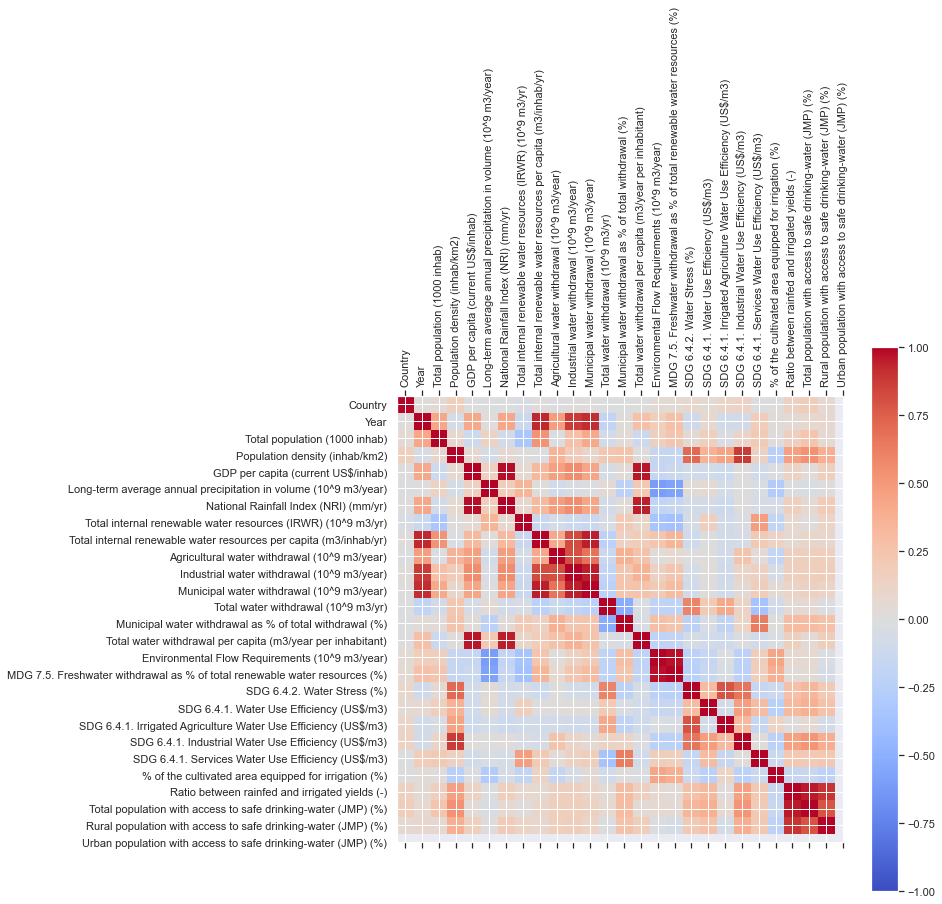

In [ ]:
corr = data.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

From the correlation heated plot above, we can observed that the SDG 6.4.2 water Stress is moderate to strong positive correlated to Population density, Total water withdrawal, SDG 6.4.1 Irrigated Agriculture WaterUse efficiency, SDG 6.4.1 Industrial, water Use Efficiency. 

In [ ]:
# SDG 6.4.2. Water Stress (%) is the target
y = data.values[:,-10]
#create the design / feature matrix
X1 = data.drop(labels=None,axis=1, index=None, columns='SDG 6.4.2. Water Stress (%)', inplace=False)
X2 = X1.values[:,:]
X = np.delete(X2,obj=0, axis=1)
futures_names = X1.columns[1:]

In [ ]:
#setting up the ridge model without normalize 
Alpha1 = 0.1
ridge_model = linear_model.Ridge(fit_intercept=True, alpha=Alpha1,copy_X=True,normalize=False)
ridge_model.fit(X,y)
print('Coefficients for Ridge Model, alphs:',str(Alpha1))
print(ridge_model.coef_[:])

#### Setting up the Lasso Model without normalize 
Here can find the important features

In [ ]:
Alpha2 = 10
lasso_model2 = linear_model.Lasso(alpha=Alpha2, normalize=False, max_iter=2000)
lasso_model2.fit(X,y)
print('Coefficients for Lasso Model, alpha:',str(Alpha2))
print(lasso_model2.coef_[:])

Alpha2 = 50
lasso_model3 = linear_model.Lasso(alpha=Alpha2,normalize=False,  max_iter=2000)
lasso_model3.fit(X,y)
print('Coefficients for Lasso Model, alpha:',str(Alpha2))
print(lasso_model3.coef_[:])

Coefficients for Lasso Model, alpha: 10
[ 0.00000000e+00  5.50716850e-06  1.39190645e-02  1.62943774e-04
  1.26118198e-03 -1.37547745e-03 -2.67899914e-03  7.30861864e-06
  0.00000000e+00  0.00000000e+00  0.00000000e+00  8.46442658e-03
 -0.00000000e+00 -4.67207606e-03 -9.90673183e-04  1.32600436e+00
 -1.89873190e-02 -0.00000000e+00 -1.79937196e-03 -2.19084775e-02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00]
Coefficients for Lasso Model, alpha: 50
[ 0.00000000e+00  1.32052920e-05  7.99715572e-03 -5.27515778e-05
  3.67761518e-04 -4.19340730e-03 -2.08917900e-03 -3.19222681e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.38608431e-03
 -0.00000000e+00  6.91380824e-04  0.00000000e+00  1.05274503e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -2.36053754e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00]


From the coefficients for Lasso Model with alpha: 50, the lasso regression model returns with 11 important factors: 

    1. Total population (1000 inhab): 0.0000132 
    2. Population density (inhab/km2): 0.00799 
    3. GDP per capita (current US dollor /inhab): -0.0000528  
    4. Long-term average annual precipitation in volume (10^9 m3/year): 0.000368 
    5. National Rainfall Index (NRI) (mm/yr): -0.00419 
    6. Total internal renewable water resources (IRWR) (10^9 m3/yr): -0.00209 
    7. Total internal renewable water resources per capita (m3/inhab/yr): -0.0000319 
    8. Total water wothdrawal (10^9 m3/yr): 0.00239 
    9. Total water withdraal per capita (m^3/ year per inhabitant): 0.000691 
    10. MDG 7.5. Freshwater withdrawal as percentage of total renewable water resources (\%): 1.0527 
    11. SDG 6.4.1 Services Water Use Efficiency (US dollor/m^3): -0.00236 

Here we can observed that the Lasso regression shows similar results as the correalation heated graphs

#### Testing the R-Square for Models

In [ ]:
# Return the coefficient of determination R^2 of the prediction.
print('RSquared Ridge')
print(ridge_model.score(X,y))
print('RSquared Lasso: Alpha = 10')
print(lasso_model2.score(X,y))
print('RSquared Lasso: Alpha = 50')
print(lasso_model3.score(X,y))


RSquared Ridge
0.9603513879021658
RSquared Lasso: Alpha = 10
0.9712583517219241
RSquared Lasso: Alpha = 50
0.941508385387604


####  The coefficient for different values of Alpha in Lasso RegressionT
Helping to defined the value of Alpha

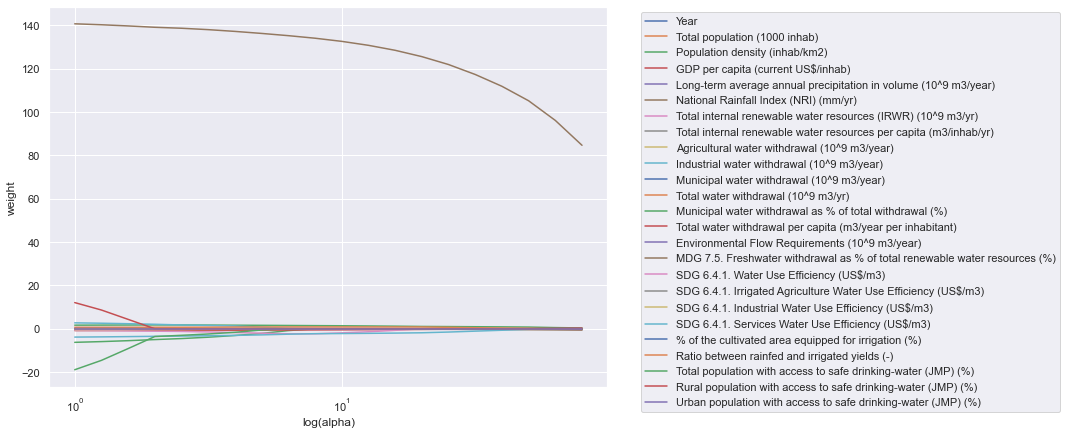

In [ ]:
# For different values of Alpha
alpha = np.power(10,np.arange(0,2,0.1))

weights = np.zeros((len(alpha),len(futures_names)),dtype=float)
for i in np.arange(0,len(alpha)):
    Lasso_model = linear_model.Lasso(fit_intercept=True, 
                                     alpha=alpha[i],
                                     copy_X=True,
                                     normalize=False, max_iter=2000)
    Lasso_model.fit(X,y)
    weights[i,:]= Lasso_model.coef_

plt.figure(figsize=(10,7))    
for i in np.arange(0,len(futures_names)):
    plt.semilogx(alpha[:],weights[:,i]*100,label=futures_names[i])

plt.xlabel('log(alpha)')
plt.ylabel('weight')
plt.legend(bbox_to_anchor=(1.05, 1),loc="upper left");

## Characterization and classification of the 38 countries
After visulizing a prediciton of making a regression model of water stress, it's natural that a question occurs us, what is the difference among those 38 countries in our dataset? Here we used EFA and PCA model to downscaling those 28 variables and made a cluster model.


### Factors affecting water performance
Because there are too many variables, that's why we use factor analysis to find the common factors of all these 25 variables,and consider how these common factors affect water performance in each countries in observed years.

In [ ]:
from bioinfokit.analys import get_data
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, classification_report
from sklearn.svm import LinearSVC
import seaborn as sns

In [ ]:
df.dtypes

Country                                                                                   object
Year                                                                                       int64
Total population (1000 inhab)                                                            float64
Population density (inhab/km2)                                                           float64
GDP per capita (current US$/inhab)                                                       float64
Long-term average annual precipitation in volume (10^9 m3/year)                          float64
National Rainfall Index (NRI) (mm/yr)                                                    float64
Total internal renewable water resources (IRWR) (10^9 m3/yr)                             float64
Total internal renewable water resources per capita (m3/inhab/yr)                        float64
Agricultural water withdrawal (10^9 m3/year)                                             float64
Industrial water withdrawal (k

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
#df1=df.iloc[:,0:27]
#collist=df.columns
df=df.dropna(axis=0)
df.reset_index(drop=True,inplace=True)
#dfarray=pd.DataFrame(df.values)
#dfarray.columns = collist
df_efa=df.iloc[:,0:27]
df_efa2=df.iloc[:,0:27]
X = df_efa.iloc[:,2:27]

df_pca=df.iloc[:,0:27]
X2=df_pca.iloc[:,5:27]
y= df_pca.iloc[:,0]
y1 = df_pca.iloc[:,1]
Y = df_pca.iloc[:,[0,1]]


X.describe()

,Total population (1000 inhab),Population density (inhab/km2),GDP per capita (current US$/inhab),Long-term average annual precipitation in volume (10^9 m3/year),National Rainfall Index (NRI) (mm/yr),Total internal renewable water resources (IRWR) (10^9 m3/yr),Total internal renewable water resources per capita (m3/inhab/yr),Agricultural water withdrawal (10^9 m3/year),Industrial water withdrawal (km<sup>3</sup>/year or 10<sup>9</sup>m<sup>3</sup>/year),Municipal water withdrawal (km<sup>3</sup>/year or 10<sup>9</sup>m<sup>3</sup>/year),...,SDG 6.4.2. Water Stress (%),SDG 6.4.1. Water Use Efficiency (US$/m3),SDG 6.4.1. Irrigated Agriculture Water Use Efficiency (US$/m3),SDG 6.4.1. Industrial Water Use Efficiency (US$/m3),SDG 6.4.1. Services Water Use Efficiency (US$/m3),% of the cultivated area equipped for irrigation (%),Ratio between rainfed and irrigated yields (-),Total population with access to safe drinking-water (JMP) (%),Rural population with access to safe drinking-water (JMP) (%),Urban population with access to safe drinking-water (JMP) (%)
count,1.510000e+02,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.121291e+05,89.012157,10632.712279,1516.419086,1229.689404,637.570358,16464.958570,45.002144,13.440347,7.606129,...,24.874220,24.882098,0.551769,81.642513,70.265579,23.867636,1.805639,88.731788,82.281457,95.391391
std,2.915120e+05,88.069338,14558.593743,2946.768023,703.340501,1265.626550,33152.750317,121.072390,46.291918,16.730699,...,25.224942,45.428699,0.829257,221.094495,75.554853,25.893317,0.277521,13.334883,17.274823,5.636121
min,2.623780e+02,2.943688,219.963624,11.286000,207.100000,3.840000,271.737627,0.000400,0.011400,0.011400,...,0.318148,0.332478,0.019356,2.260524,1.728197,0.006733,1.289000,39.600000,25.500000,76.300000
25%,7.455337e+03,32.501017,1653.671921,86.037920,722.500000,23.500000,1646.960489,1.184000,0.135500,0.505900,...,4.139061,4.692675,0.119436,14.179242,22.066017,5.496912,1.603000,84.650000,73.700000,93.950000
50%,2.672037e+04,66.691821,4635.692195,381.900000,1112.000000,84.000000,3403.677490,5.101000,0.762492,1.063000,...,18.130315,12.333141,0.212079,30.288144,44.279650,15.768986,1.778000,94.100000,87.000000,97.700000
75%,5.402143e+04,103.799680,11637.343240,1014.558300,1813.000000,409.000000,19728.805425,26.764545,3.879500,4.001269,...,38.436782,20.708185,0.452262,66.333745,78.508973,35.072869,1.903000,98.150000,97.100000,99.350000
max,1.452625e+06,407.231917,70492.921730,14995.000000,3194.000000,5661.000000,205294.099300,688.000000,301.320000,79.400000,...,137.920360,349.767068,3.651947,2206.286394,374.909733,124.360786,2.612000,100.000000,100.000000,100.000000


#### EFA model

In [ ]:
####Normalization(x-μ)/std
X_norm = X.apply(lambda x:(x-x.mean())/x.std())
X_stand = StandardScaler().fit_transform(X)

In [ ]:
####Bartletts test and KMO test
print('Bartletts test of sphericity tests')
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X_stand)
print('chi-square',chi_square_value,'P-value', p_value)

#KMO>0.6
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X_stand)
print('KMO Test',kmo_model)

Bartletts test of sphericity tests
chi-square 7140.825839795088 P-value 0.0
KMO Test 0.6035142728057387


/Users/pai/opt/anaconda3/lib/python3.8/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


Eigenvalues of correlation matrix： [5.70976884e+00 4.52549733e+00 3.51059978e+00 2.63258766e+00
 1.92359619e+00 1.49120265e+00 1.13523436e+00 9.29616419e-01
 7.93937614e-01 6.36094068e-01 4.41006641e-01 3.74685424e-01
 2.40256408e-01 1.79560909e-01 1.53038264e-01 1.24777276e-01
 6.12723258e-02 4.66092288e-02 2.95959305e-02 2.60277310e-02
 1.71719281e-02 9.74609606e-03 6.99351821e-03 1.12275123e-03
 6.63941157e-07]


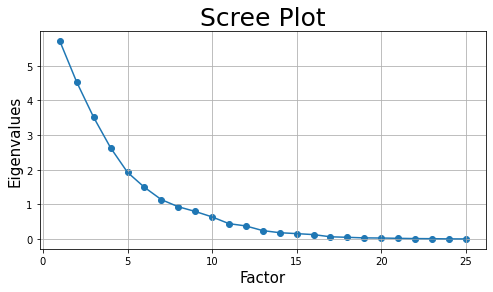

In [ ]:
#Eigenvalues of correlation matrix 
fa = FactorAnalyzer(25, rotation='varimax',method='principal',impute='mean')
fa.fit(X_stand)
ev, v = fa.get_eigenvalues()
var = fa.get_factor_variance()
print('Eigenvalues of correlation matrix：',ev)
#Create scree plot using matplotlib
plt.figure(figsize=(8,4))
plt.scatter(range(1,X_stand.shape[1]+1),ev)
plt.plot(range(1,X_stand.shape[1]+1),ev)
plt.title('Scree Plot',fontdict={'weight':'normal','size': 25})
plt.xlabel('Factor',fontdict={'weight':'normal','size': 15})
plt.ylabel('Eigenvalues',fontdict={'weight':'normal','size': 15})
plt.grid()
# plt.savefig('E:/suishitu.jpg')
plt.show()

#Number of factors
n_factors = sum(ev>1)

In [ ]:
#Result after rotating
fa2 = FactorAnalyzer(n_factors,rotation='varimax',method='principal')
fa2.fit(X_stand)
#Contribution rate
var = fa2.get_factor_variance()

#Factor scores
fa2_score = fa2.transform(X_stand)

column_list = ['fac'+str(i) for i in np.arange(n_factors)+1]
fa_score = pd.DataFrame(fa2_score,columns=column_list)
for col in fa_score.columns:
    df_efa[col] = fa_score[col]
print("\nFactor scores:\n",fa_score)    

#Contribution rate sheet
df_efa_fv = pd.DataFrame()
df_efa_fv['Factor'] = column_list
df_efa_fv['Variance contribute rates'] = var[1]
df_efa_fv['Cumulative contribution rate'] = var[2]
df_efa_fv['Propotion of cumulative contribution rate'] = var[1]/var[1].sum()
print("\nVariance contribute:\n",df_efa_fv)  


Factor scores:
          fac1      fac2      fac3      fac4      fac5      fac6      fac7
0   -0.485452 -0.137818 -0.000806  2.149121  0.185321 -0.630593 -0.605914
1   -0.605645  0.248052  0.182343 -0.162935 -0.691725  0.359668 -0.366009
2   -0.339481  0.422231 -0.414652  0.649232 -0.515365 -0.406998  0.135039
3   -0.289304  1.339201 -0.771830 -0.705486  0.596727  0.748675 -0.692827
4   -0.274628 -0.952409 -0.656306  0.888949 -0.605769  0.541694  1.099472
..        ...       ...       ...       ...       ...       ...       ...
146 -0.247894  0.411807 -0.196225 -0.510578 -0.579231 -0.572802 -0.931856
147 -0.085197 -2.882909 -0.020927  0.513370  1.289530 -0.362116  0.123292
148  0.888863  0.416701  1.247028  0.004532  0.460253  4.420119 -0.162449
149  0.552983  0.907019 -0.509622 -0.249331 -0.757075 -0.876767  0.177453
150 -0.486617 -0.506327 -0.304388  0.149055 -0.564164  0.221511 -0.833607

[151 rows x 7 columns]

Variance contribute:
   Factor  Variance contribute rates  Cumulative 

There are seven factors that eigenvalues greater than 1,and it's cumulative contribution rate is 84%. But considering about interpretation,we try to use less common factors and check it whether it is a satisfied model

In [ ]:
#Result after rotating
fa3 = FactorAnalyzer(4,rotation='varimax',method='principal')
fa3.fit(X_stand)
#Contribution rate
var = fa3.get_factor_variance()

#Factor scores
fa3_score = fa3.transform(X_stand)

column_list = ['fac'+str(i) for i in np.arange(4)+1]
fa_score = pd.DataFrame(fa3_score,columns=column_list)
for col in fa_score.columns:
    df_efa2[col] = fa_score[col]
print("\nFactor scores:\n",fa_score)    

#Contribution rate sheet
df_efa_fv = pd.DataFrame()
df_efa_fv['Factor'] = column_list
df_efa_fv['Variance contribute rates'] = var[1]
df_efa_fv['Cumulative contribution rate'] = var[2]
df_efa_fv['Propotion of cumulative contribution rate'] = var[1]/var[1].sum()
print("\nVariance contribute:\n",df_efa_fv)  


Factor scores:
          fac1      fac2      fac3      fac4
0   -0.396322 -0.657990  1.536461 -0.335984
1   -0.225854 -0.042928 -0.410450  0.372938
2   -0.559831  0.052520  0.549425  0.599207
3   -0.487253  1.555625 -0.115984 -0.690068
4   -0.545544 -0.604450  0.792578  1.090484
..        ...       ...       ...       ...
146 -0.351356 -0.176398 -0.321525 -0.092156
147 -0.250247 -2.105241  0.374296 -1.369673
148  2.385114  1.654109 -0.137615 -0.164580
149 -0.053491  0.399265  0.197603  0.785161
150 -0.434824 -0.750978  0.164503 -0.081233

[151 rows x 4 columns]

Variance contribute:
   Factor  Variance contribute rates  Cumulative contribution rate  \
0   fac1                   0.213329                      0.213329   
1   fac2                   0.177542                      0.390871   
2   fac3                   0.142895                      0.533766   
3   fac4                   0.121372                      0.655138   

   Propotion of cumulative contribution rate  
0              

If we choose four common factors,it seems that cumulative contribution rate is 66%. Not bad! 

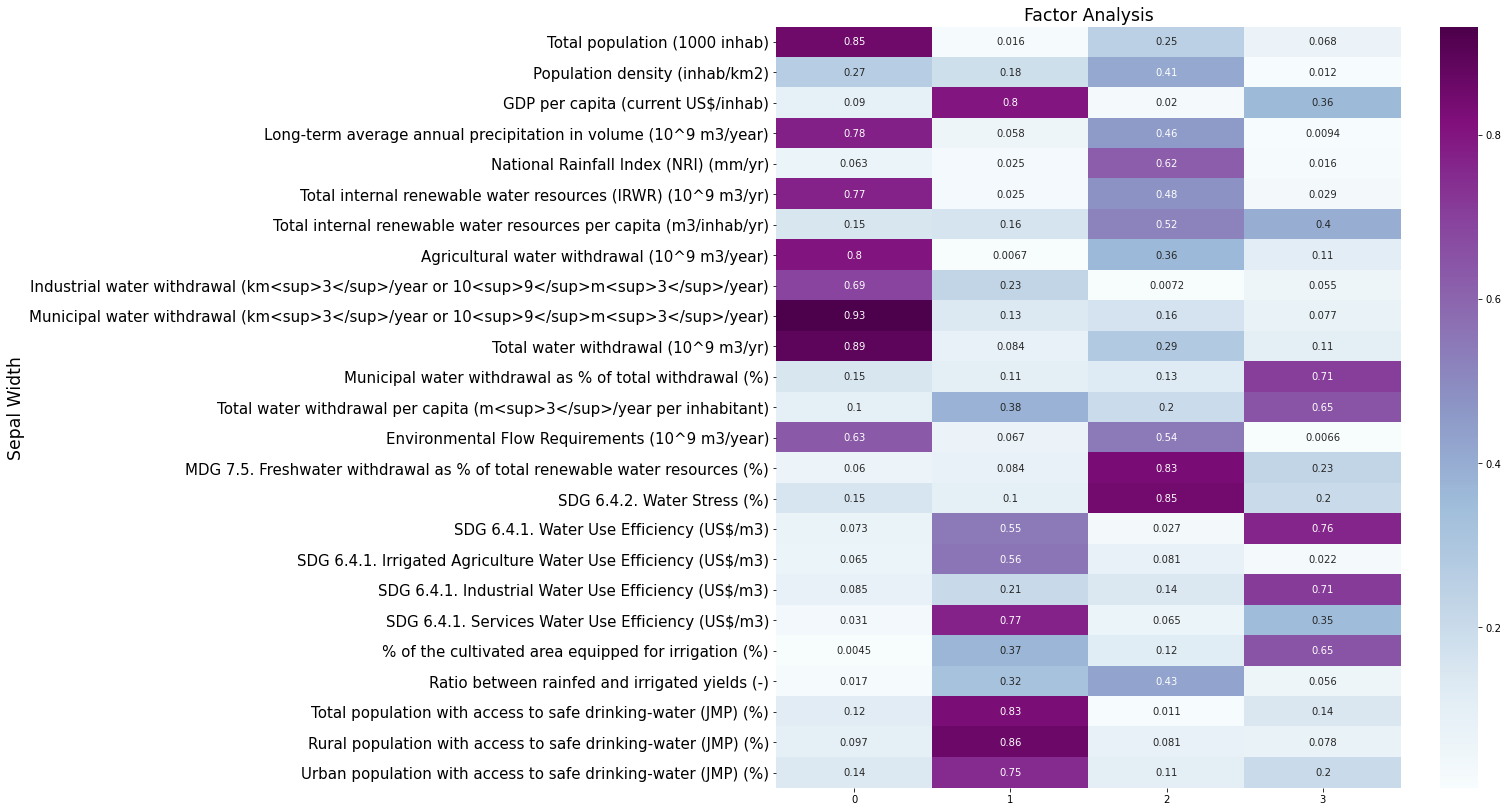

In [ ]:
###### Factor1:Population
###### Factor2:Economy and technology
###### Factor3:Water source
###### Factor4:Urbanization
faloadings = pd.DataFrame(np.abs(fa3.loadings_), index=X.columns)
plt.figure(figsize = (14,14))
ax = sns.heatmap(faloadings, annot=True, cmap="BuPu")
# y-text label
ax.yaxis.set_tick_params(labelsize=15)
plt.title('Factor Analysis', fontsize='xx-large')
# Set y-axis label
plt.ylabel('Sepal Width', fontsize='xx-large')
plt.savefig('factorAnalysis.png', dpi=500)

According  the heat map above, we can get factor model as below:
Xn:Original variables(n=1,2,3,...,25)
Fn:factor(n=1,2,3,4)

X1=0.85F1+0.016F2+0.25F3+0.068F4
X2=0.27F1+0.018F2+0.41F3+0.012F4
               ...
X10=0.93F1+0.13F2+0.16F3+0.077F4
X11=0.89F1+0.084F2+0.29F3+0.11F4
               ...
X24=0.097F1+0.86F2+0.081F3+0.078F4
X25=0.14F1+0.75F2+0.11F3+0.2F4


From the factor model,we can find that factor 1 have high significant coefficient in 'Total population','Total water withdraw'and'...withdraw',there is no doubt that water withdraw is positive correlated with population,so we consider factor i as 'Population factor';


Factor 2 have high significant coefficient in 'GDP per capital','Services water use efficiency'and'...population with access to safe drinking water'.Safe drinking water population is production of processed nature water and related to technical equipment, so we consider factoe as 'Economy and technology'


Factor 3 have high significant coefficient in 'Water resourse' and 'Water stress',we consider factor 3 as 'Water source'


Factor 4 have high coefficient in'Municipal water withdraw','Total water withdraw per capital', we consider factor 4 as 'Unbanlization'.


These four common factors reflect the water performance from different aspects


Summarize:


Factor1:Population

Factor2:Economy and technology


Factor3:Water source


Factor4:Urbanization

In [ ]:
# Calculate the comprehensive score and ranking 
# (comprehensive score
#  = cumulative variance contribution proportion 1 * factor score 1
#  + cumulative variance contribution proportion 2 * factor score 2 + …)
df_efa2['factor_score'] = ((var[1]/var[1].sum())*fa3_score).sum(axis=1)
df_efa2 = df_efa2.sort_values(by='factor_score',ascending=False)

In [ ]:
####sort all
df_efa2['sort_num']=df_efa2['factor_score'].rank(ascending=0,method='dense')

In [ ]:
####sort by year
df_efa2['group_sort']=df_efa2['factor_score'].groupby(df_efa2['Year']).rank(ascending=0,method='dense')

In [ ]:
for name1,group1 in df_efa2.iloc[:,[0,1,31,33]].groupby('Country'):
  print(name1)
  print(group1)

Algeria
     Country  Year  factor_score  group_sort
114  Algeria  2017      0.115569        15.0
76   Algeria  2012      0.020135        16.0
38   Algeria  2007     -0.010559        16.0
0    Algeria  2002     -0.034487        16.0
Argentina
       Country  Year  factor_score  group_sort
115  Argentina  2017      0.028260        18.0
77   Argentina  2012      0.012201        18.0
39   Argentina  2007     -0.045997        18.0
1    Argentina  2002     -0.105611        20.0
Armenia
     Country  Year  factor_score  group_sort
78   Armenia  2012      0.315675         7.0
40   Armenia  2007      0.286579         7.0
116  Armenia  2017      0.270619         9.0
2    Armenia  2002      0.062786        10.0
Austria
     Country  Year  factor_score  group_sort
41   Austria  2007      0.207960         9.0
117  Austria  2017      0.202965        12.0
79   Austria  2012      0.202030        12.0
3    Austria  2002      0.109770         9.0
Azerbaijan
        Country  Year  factor_score  group_so

We calulate comprehensive factor score in each observation.Then we used two methods to sort the comprehensive factor scores of each observation. The first is to sort all the observations regardless of the year of observations; The second is to sort the observations in different years,which could clearly show the score performance of each country in 4 years.We found that India, China, and the United States have high ranking is these four years.

### Regional perspectives
Now we only use water-related variables

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import math as m
from time import time
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#### PCA model

First we use PCA model to fit our data

In [ ]:
#Standarlization
X_stand = StandardScaler().fit_transform(X2)
print(X_stand)

In [ ]:
#Reduction to 3 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_stand)
#Variance
var_ratio_pca = pca.explained_variance_ratio_
print(var_ratio_pca)
print(sum(var_ratio_pca))

#### Cluster

And then we use K-means model to cluster observations, we aimed to classify these countries in 3 groups according to different water performance characteristics，

In [ ]:
##### 3D
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import math as m
from time import time
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

0.016769886016845703


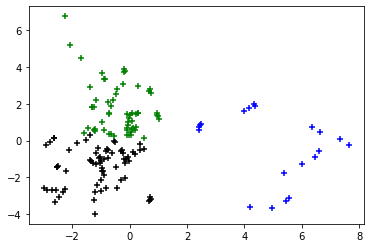

In [ ]:
NOISE = 0
UNASSIGNED = -1
def load_data():
    data=(X2-X2.mean())/X2.std()
    pca = PCA(n_components=3) 
    XP = pca.fit_transform(data)
    return XP

def cal_dis(data, clu, k):

    dis = []
    for i in range(len(data)):
        dis.append([])
        for j in range(k):
            dis[i].append(m.sqrt((data[i, 0] - clu[j, 0])**2 + (data[i, 1]-clu[j, 1])**2))
    return np.asarray(dis)

def divide(data, dis):

    clusterRes = [0] * len(data)
    for i in range(len(data)):
        seq = np.argsort(dis[i])
        clusterRes[i] = seq[0]
    return np.asarray(clusterRes)

def center(data, clusterRes, k):

    clunew = []
    for i in range(k):
       
        idx = np.where(clusterRes == i)
        sum = data[idx].sum(axis=0)
        avg_sum = sum/len(data[idx])
        clunew.append(avg_sum)
    clunew = np.asarray(clunew)
    return clunew[:, 0: 2]

def classfy(data, clu, k):
    
    clulist = cal_dis(data, clu, k)
    clusterRes = divide(data, clulist)
    clunew = center(data, clusterRes, k)
    err = clunew - clu
    return err, clunew, k, clusterRes

def plotRes(data, clusterRes, clusterNum):
   
    nPoints = len(data)
    scatterColors = ['black', 'blue', 'green', 'yellow', 'red', 'purple']
    for i in range(clusterNum):
        color = scatterColors[i % len(scatterColors)]
        x1 = [];  y1 = []
        for j in range(nPoints):
            if clusterRes[j] == i:
                x1.append(data[j, 0])
                y1.append(data[j, 1])
        plt.scatter(x1, y1, c=color, alpha=1, marker='+')
    plt.show()


if __name__ == '__main__':
    t1=time() 
    k =3                              
    data = load_data()
    clu = random.sample(data[:, 0:2].tolist(), k)  
    clu = np.asarray(clu)
    err, clunew,  k, clusterRes = classfy(data, clu, k)
    while np.any(abs(err) > 0):
        err, clunew,  k, clusterRes = classfy(data, clunew, k)
    clulist = cal_dis(data, clunew, k)
    clusterResult = divide(data, clulist)
    print(time()-t1)       
    plotRes(data, clusterResult, k)


In [ ]:
#######define 3D graph
def componential_plot_static_3d(reduced_data, labels, pc, variable):
    """draw a static componential plot in 3d for three principle components
    
    :param reduced_data: data processed by PCA
    :param labels: labels of original dataset 
    :param pc: all the principle components
    :param variable: the name of the variables of the data set
    """
    
    fig = plt.figure(1, figsize=(14, 12))
    ax = plt.axes(projection='3d')
    
    legend = []  # 
    classes = np.unique(labels)  # label type
    n = pc.shape[1]
    colors = ['g', 'r', 'y','b']
    markers = ['o', '^', 'x','s']
    
    x = reduced_data[:, 0]  # variable contributions for PC1
    y = reduced_data[:, 1]  # variable contributions for PC2 
    z = reduced_data[:, 2]  # variable contributions for PC3
    scalex = 1.0/(x.max() - x.min())
    scaley = 1.0/(y.max() - y.min())
    scalez = 1.0/(z.max() - z.min())
    
    # Draw a data point projection plot that is projected to 
    # a three-dimensional space using normal PCA
    for i, label in enumerate(classes):
        ax.scatter3D(x[labels==label] * scalex,
                     y[labels==label] * scaley,
                     z[labels==label] * scalez,
                     linewidth=0.01) 
        # hyperparameter in plt.scatter(): c=colors[i], marker=markers[i]
        legend.append("Label: {}".format(label))
    
    ax.legend(legend)
    
    # the initial angle to draw the 3d plot
    azim = -60  # azimuth
    elev = 30   # elevation
    ax.view_init(elev, azim)  # set the angles
    
    # plot arrows as the variable contribution,
    # each variable has a score for PC1, for PC2 and for PC3 respectively
    for i in range(n):
        ax.quiver(0, 0, 0, pc[0, i], pc[1, i], pc[2, i], color='k', alpha=0.7,
                  linewidth=1, arrow_length_ratio=0.05)
        #ax.text(pc[0, i]*1.1, pc[1, i]*1.1, pc[2, i]*1.1,variable[i],
                #ha='center', va='center', color='k', fontsize=12)
        
    ax.set_xlabel("$PC1$")
    ax.set_ylabel("$PC2$")
    ax.set_zlabel("$PC3$")
    plt.title("Componential Plot in 3 Dimension")
    plt.grid()
    #save_fig("Componential_Plot_in_3_Dimension")

In [ ]:
fig3=plt.figure(figsize=(15,7.5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:,0][y1==2002],X_pca[:,1][y1==2002],marker='*',label='2002')
plt.scatter(X_pca[:,0][y1==2007],X_pca[:,1][y1==2007],marker='+',label='2007')
plt.scatter(X_pca[:,0][y1==2012],X_pca[:,1][y1==2012],marker='o',label='2012')
plt.scatter(X_pca[:,0][y1==2017],X_pca[:,1][y1==2017],marker='v',label='2017')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:,0][clusterResult==0],X_pca[:,1][clusterResult==0],marker='+',label='A')
plt.scatter(X_pca[:,0][clusterResult==1],X_pca[:,1][clusterResult==1],marker='p',label='B')
plt.scatter(X_pca[:,0][clusterResult==2],X_pca[:,1][clusterResult==2],marker='v',label='C')
plt.legend()


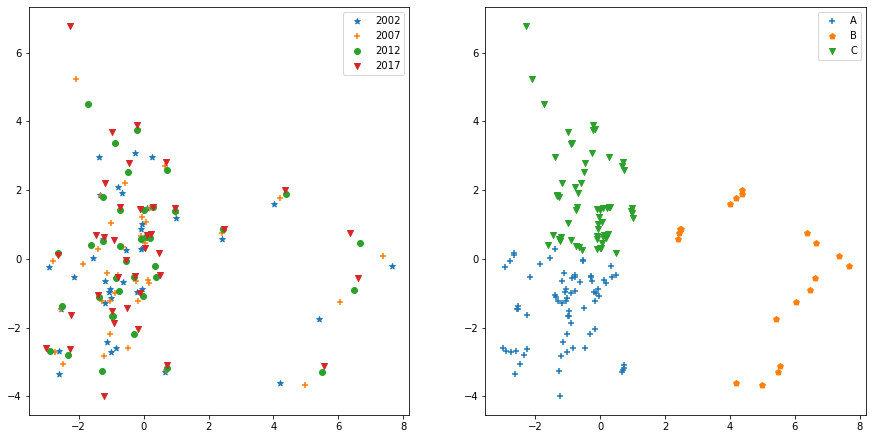

In [ ]:
fig3=plt.figure(figsize=(15,7.5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:,0][y1==2002],X_pca[:,1][y1==2002],marker='*',label='2002')
plt.scatter(X_pca[:,0][y1==2007],X_pca[:,1][y1==2007],marker='+',label='2007')
plt.scatter(X_pca[:,0][y1==2012],X_pca[:,1][y1==2012],marker='o',label='2012')
plt.scatter(X_pca[:,0][y1==2017],X_pca[:,1][y1==2017],marker='v',label='2017')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:,0][clusterResult==0],X_pca[:,1][clusterResult==0],marker='+',label='A')
plt.scatter(X_pca[:,0][clusterResult==1],X_pca[:,1][clusterResult==1],marker='p',label='B')
plt.scatter(X_pca[:,0][clusterResult==2],X_pca[:,1][clusterResult==2],marker='v',label='C')
plt.legend()


We found that the distributions in four years are very similar.

In [ ]:
#######3Dplot
def componential_plot_static_3d(reduced_data, labels, pc, variable):
    """draw a static componential plot in 3d for three principle components
    
    :param reduced_data: data processed by PCA
    :param labels: labels of original dataset 
    :param pc: all the principle components
    :param variable: the name of the variables of the data set
    """
    
    fig = plt.figure(1, figsize=(14, 12))
    ax = plt.axes(projection='3d')
    
    legend = []  # 
    classes = np.unique(labels)  # label type
    n = pc.shape[1]
    colors = ['g', 'r', 'y','b']
    markers = ['o', '^', 'x','s']
    
    x = reduced_data[:, 0]  # variable contributions for PC1
    y = reduced_data[:, 1]  # variable contributions for PC2 
    z = reduced_data[:, 2]  # variable contributions for PC3
    scalex = 1.0/(x.max() - x.min())
    scaley = 1.0/(y.max() - y.min())
    scalez = 1.0/(z.max() - z.min())
    
    # Draw a data point projection plot that is projected to 
    # a three-dimensional space using normal PCA
    for i, label in enumerate(classes):
        ax.scatter3D(x[labels==label] * scalex,
                     y[labels==label] * scaley,
                     z[labels==label] * scalez,
                     linewidth=0.01) 
        # hyperparameter in plt.scatter(): c=colors[i], marker=markers[i]
        legend.append("Label: {}".format(label))
    
    ax.legend(legend)
    
    # the initial angle to draw the 3d plot
    azim = -60  # azimuth
    elev = 30   # elevation
    ax.view_init(elev, azim)  # set the angles
    
    # plot arrows as the variable contribution,
    # each variable has a score for PC1, for PC2 and for PC3 respectively
    for i in range(n):
        ax.quiver(0, 0, 0, pc[0, i], pc[1, i], pc[2, i], color='k', alpha=0.7,
                  linewidth=1, arrow_length_ratio=0.05)
        #ax.text(pc[0, i]*1.1, pc[1, i]*1.1, pc[2, i]*1.1,variable[i],
                #ha='center', va='center', color='k', fontsize=12)
        
    ax.set_xlabel("$PC1$")
    ax.set_ylabel("$PC2$")
    ax.set_zlabel("$PC3$")
    plt.title("Componential Plot in 3 Dimension")
    plt.grid()
    #save_fig("Componential_Plot_in_3_Dimension")

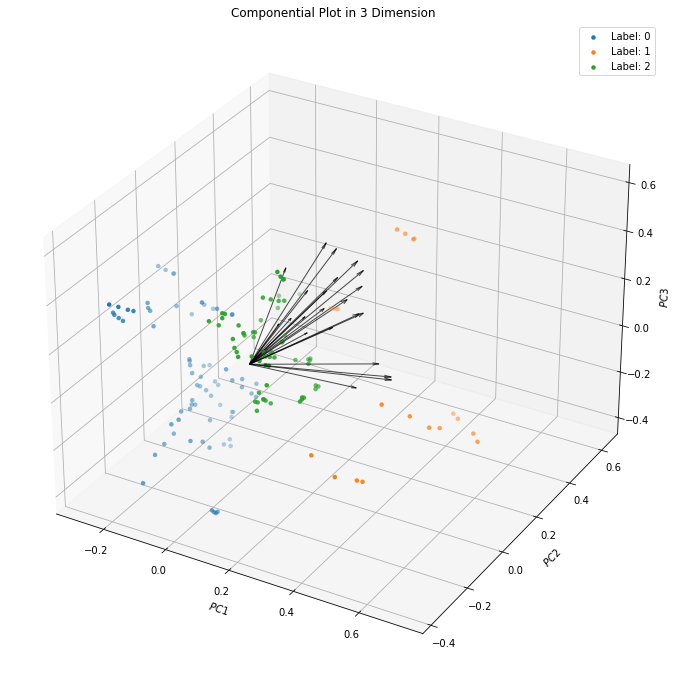

In [ ]:
arrayYear=Y.values[:,1]
arrayCountry=Y.values[:,0]
pc=abs( pca.components_ )
variables=X2.columns
componential_plot_static_3d(X_pca,clusterResult,pc,variables)

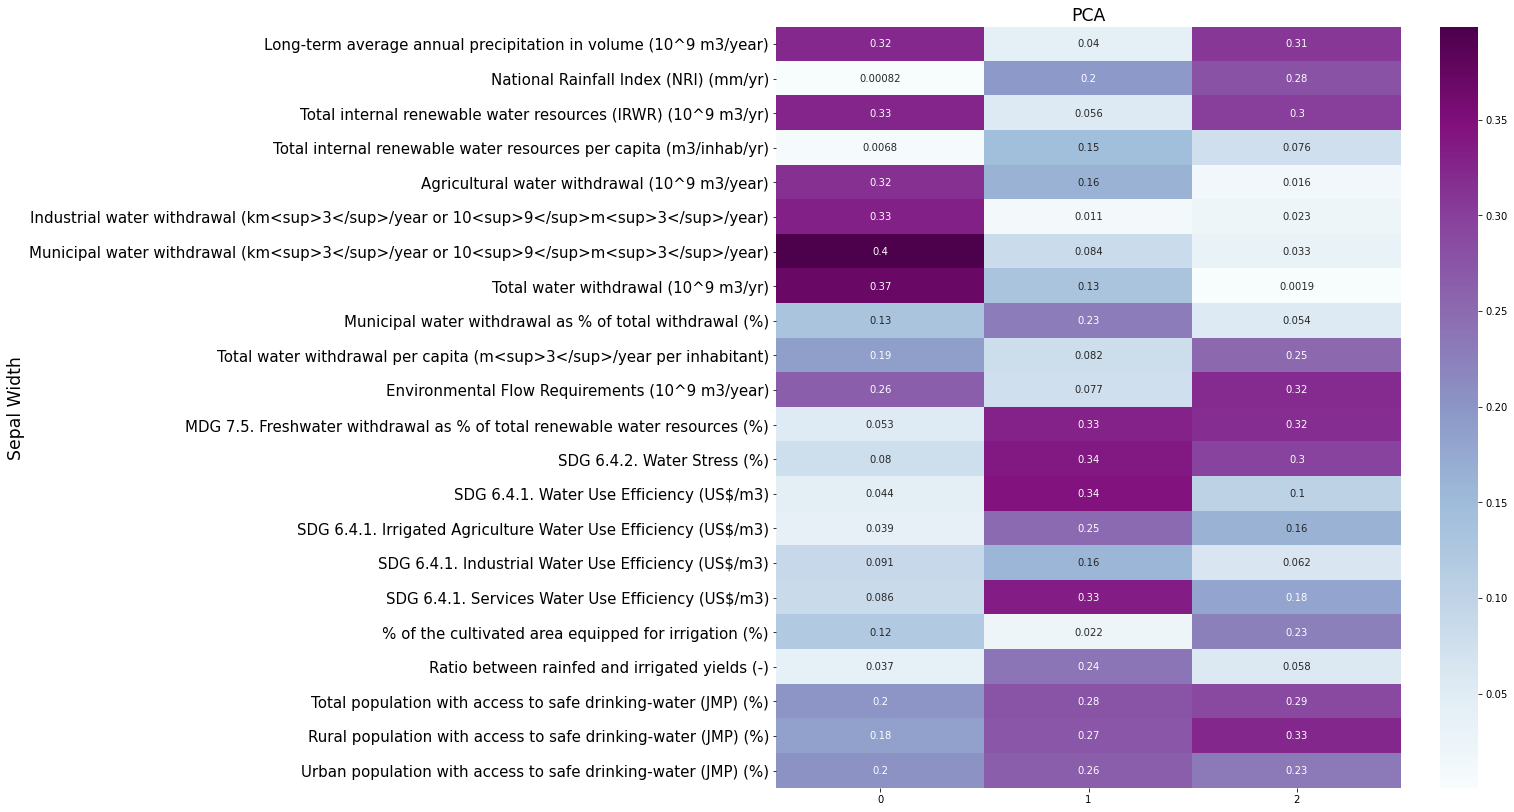

In [ ]:
pcaloadings=pd.DataFrame(abs( pca.components_ ))
pcaloadings.columns=X2.columns
pcaloadings=pcaloadings.T

plt.figure(figsize = (14,14))
ax = sns.heatmap(pcaloadings, annot=True, cmap="BuPu")
# y-text
ax.yaxis.set_tick_params(labelsize=15)
plt.title('PCA', fontsize='xx-large')
# Set y-axis label
plt.ylabel('Sepal Width', fontsize='xx-large')
plt.savefig('PCA.png', dpi=500)

According to PCA result, we abstracted 3 principle Components as:


PC1:Water population


PC2:Water efficiency


PC3:Water resourse

In [ ]:
pca_result=pd.DataFrame(X_pca)
CR=pd.DataFrame(clusterResult)
CR.columns=['Cluster']
pca_result.columns=['Water_Withdraw','Water_eff','Water_Sourse'] 
result=CR.join(pca_result)
array = Y.values
Y=pd.DataFrame(array)
Y.columns=['Country','Year']
final=Y.join(result)
Performance=pd.merge(final,df_pca,how="right")
Performance

,Country,Year,Cluster,Water_Withdraw,Water_eff,Water_Sourse,Total population (1000 inhab),Population density (inhab/km2),GDP per capita (current US$/inhab),Long-term average annual precipitation in volume (10^9 m3/year),...,SDG 6.4.2. Water Stress (%),SDG 6.4.1. Water Use Efficiency (US$/m3),SDG 6.4.1. Irrigated Agriculture Water Use Efficiency (US$/m3),SDG 6.4.1. Industrial Water Use Efficiency (US$/m3),SDG 6.4.1. Services Water Use Efficiency (US$/m3),% of the cultivated area equipped for irrigation (%),Ratio between rainfed and irrigated yields (-),Total population with access to safe drinking-water (JMP) (%),Rural population with access to safe drinking-water (JMP) (%),Urban population with access to safe drinking-water (JMP) (%)
0,Algeria,2002,0,-1.141284,-2.415546,-1.647939,31855.109,13.374721,1775.875268,211.97486,...,85.037372,15.008760,0.343842,103.287177,20.403191,7.623864,2.207369,88.8,83.7,92.0
1,Argentina,2002,2,-0.089147,0.279733,0.112311,37681.749,13.552636,2918.591423,1643.00000,...,8.794229,9.249703,0.109619,22.932637,39.086531,7.408568,1.690000,96.7,83.7,98.2
2,Armenia,2002,0,-0.625464,-0.661076,-1.394416,3033.978,102.016745,835.283238,16.71388,...,34.940488,2.209566,0.469899,17.448563,3.788347,55.702648,1.778000,93.7,84.7,98.7
3,Austria,2002,2,-0.255646,3.079024,-1.665812,8134.412,96.976776,26232.686230,93.10680,...,9.883946,78.500721,2.138762,27.501602,312.934543,6.318223,1.778000,100.0,100.0,100.0
4,Azerbaijan,2002,0,-0.848730,-2.591063,-0.910166,8277.061,95.578072,753.417207,38.71020,...,44.491058,1.291719,0.244383,2.260524,6.039129,69.115936,1.778000,75.8,61.5,89.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Ukraine,2017,2,-0.901614,0.555175,0.357929,44487.709,73.710064,2536.925650,341.00575,...,11.188132,7.749511,0.059290,5.384618,21.564308,7.737088,1.778000,96.2,97.8,95.5
147,United Republic of Tanzania,2017,0,-2.997599,-2.585198,2.416359,54660.339,57.701192,954.877401,1014.55830,...,12.963241,6.915170,0.183339,533.921214,41.083469,2.322684,2.612000,55.6,45.5,77.2
148,United States of America,2017,1,6.367942,0.741297,-0.159038,325084.756,33.059444,60159.823420,7030.83810,...,28.161984,42.378501,0.203423,15.115225,267.560173,16.647054,1.579000,99.2,98.2,99.4
149,Viet Nam,2017,2,0.482764,0.161597,-0.736193,94600.648,285.604106,2342.244006,603.16983,...,18.130315,2.349448,0.373668,20.351487,83.840791,39.777735,2.031000,97.6,96.9,99.1


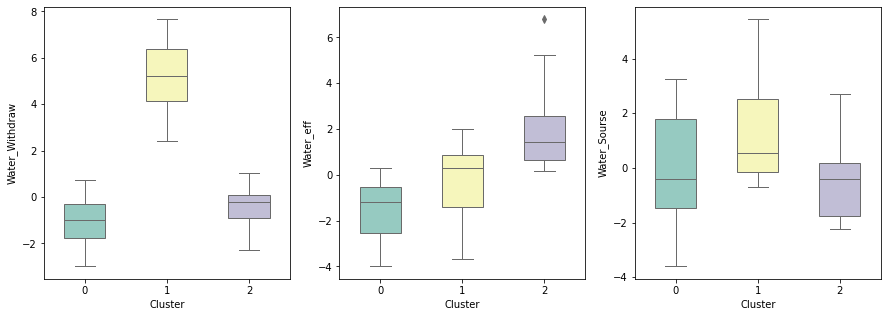

In [ ]:
plt.figure(figsize=(15, 5))
#1
plt.subplot(1, 3, 1)
sns.boxplot(x="Cluster", y='Water_Withdraw', data=Performance, width=0.5, linewidth=1.0, palette="Set3") 
#2
plt.subplot(1, 3, 2)
sns.boxplot(x="Cluster", y='Water_eff', data=Performance, width=0.5, linewidth=1.0, palette="Set3") 
#3
plt.subplot(1, 3, 3)
sns.boxplot(x="Cluster", y='Water_Sourse', data=Performance, width=0.5, linewidth=1.0, palette="Set3") 
plt.show()

Cluster Result


Withdraw   Efficiency   Source                          
0:  low         low        low  ---------> A              
1:  high       medium      high ---------> B              
2:  low         high       low  ---------> C              


In [ ]:
#  Check each year cluster in countries
for name2002,group2002 in Performance[Performance['Year'] == 2002].iloc[:,[0,2]].groupby('Cluster'):
  print(name2002)
  print(group2002)
for name2007,group2007 in Performance[Performance['Year'] == 2007].iloc[:,[0,2]].groupby('Cluster'):
  print(name2007)
  print(group2007)
for name2012,group2012 in Performance[Performance['Year'] == 2012].iloc[:,[0,2]].groupby('Cluster'):
  print(name2012)
  print(group2012)
for name2017,group2017 in Performance[Performance['Year'] == 2017].iloc[:,[0,2]].groupby('Cluster'):
  print(name2017)
  print(group2017)

0
                        Country  Cluster
0                       Algeria        0
2                       Armenia        0
4                    Azerbaijan        0
7      Central African Republic        0
10                         Cuba        0
11           Dominican Republic        0
12                        Ghana        0
15   Iran (Islamic Republic of)        0
18                        Kenya        0
19                   Madagascar        0
21                       Mexico        0
22                      Morocco        0
23                      Myanmar        0
25                    Nicaragua        0
29                 South Africa        0
33  United Republic of Tanzania        0
35                     Viet Nam        0
36                     Zimbabwe        0
1
                     Country  Cluster
6                     Brazil        1
8                      China        1
14                     India        1
27        Russian Federation        1
34  United States of Americ

In [ ]:
##  Check each country cluster in each years
#  Ghana：12,50,88,126[0,0,2,2]
#  Nicaragua 25,61,101,139[0,0,2,2]
# Viet Nam 35,73,111,149[0,0,0,2]
for name,group in Performance.iloc[:,0:3].groupby('Country'):
  print(name)
  print(group)

Algeria
     Country  Year  Cluster
0    Algeria  2002        0
37   Algeria  2007        0
75   Algeria  2012        0
113  Algeria  2017        0
Argentina
       Country  Year  Cluster
1    Argentina  2002        2
38   Argentina  2007        2
76   Argentina  2012        2
114  Argentina  2017        2
Armenia
     Country  Year  Cluster
2    Armenia  2002        0
39   Armenia  2007        0
77   Armenia  2012        0
115  Armenia  2017        0
Austria
     Country  Year  Cluster
3    Austria  2002        2
40   Austria  2007        2
78   Austria  2012        2
116  Austria  2017        2
Azerbaijan
        Country  Year  Cluster
4    Azerbaijan  2002        0
41   Azerbaijan  2007        0
79   Azerbaijan  2012        0
117  Azerbaijan  2017        0
Belize
    Country  Year  Cluster
5    Belize  2002        2
42   Belize  2007        2
80   Belize  2012        2
118  Belize  2017        2
Brazil
    Country  Year  Cluster
6    Brazil  2002        1
43   Brazil  2007        1


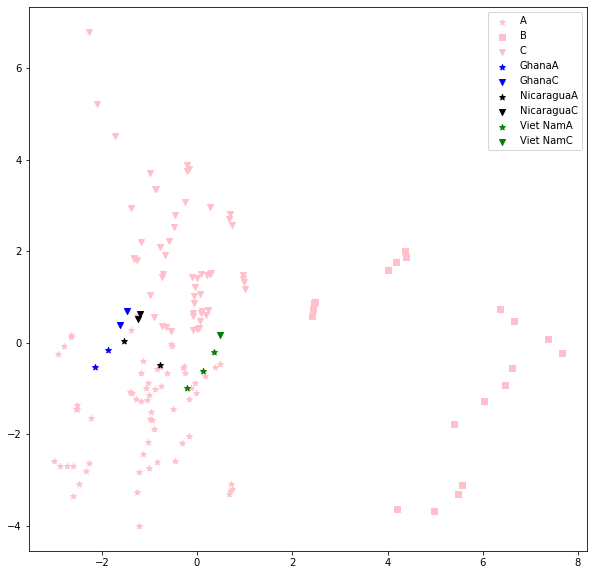

In [ ]:
####
fig5=plt.figure(figsize=(10,10))
arrayCountry = y.values
arrayYear = y1.values
plt.scatter(X_pca[:,0][clusterResult==0],X_pca[:,1][clusterResult==0],marker='*',label='A',c='pink')
plt.scatter(X_pca[:,0][clusterResult==1],X_pca[:,1][clusterResult==1],marker='s',label='B',c='pink')
plt.scatter(X_pca[:,0][clusterResult==2],X_pca[:,1][clusterResult==2],marker='v',label='C',c='pink')
#Ghana
plt.scatter(X_pca[:,0][[12,50]],X_pca[:,1][[12,50]],marker='*',label='GhanaA',c='blue')
plt.scatter(X_pca[:,0][[88,126]],X_pca[:,1][[88,126]],marker='v',label='GhanaC',c='blue')
#Nicaragua
plt.scatter(X_pca[:,0][[25,61]],X_pca[:,1][[25,61]],marker='*',label='NicaraguaA',c='black')
plt.scatter(X_pca[:,0][[101,139]],X_pca[:,1][[101,139]],marker='v',label='NicaraguaC',c='black')
#Viet Nam
plt.scatter(X_pca[:,0][[35,73,111]],X_pca[:,1][[35,73,111]],marker='*',label='Viet NamA',c='green')
plt.scatter(X_pca[:,0][[149]],X_pca[:,1][[149]],marker='v',label='Viet NamC',c='green')
plt.legend()
plt.show()

We found that there are three countries were clusteres in different groups in different years. So we make this plot to show performance of these three countries intuitively,we want to find if they really have significantly difference in different years. The results show that they are clusterd in different group just because of closing to boundary.

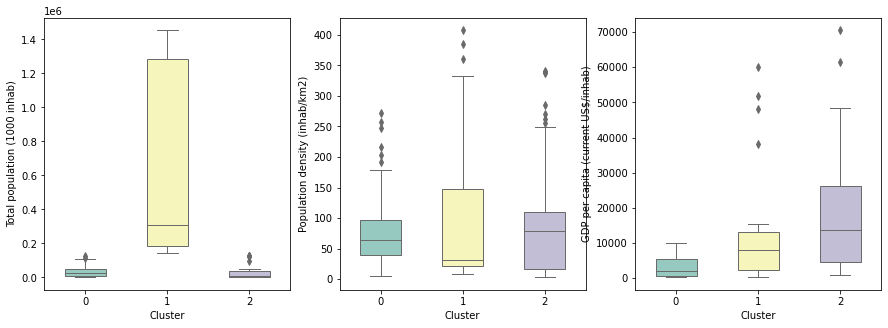

In [ ]:
plt.figure(figsize=(15,5))
#1
plt.subplot(1, 3, 1)
sns.boxplot(x="Cluster", y='Total population (1000 inhab)', data=Performance, width=0.5, linewidth=1.0, palette="Set3") 
#2
plt.subplot(1, 3, 2)
sns.boxplot(x="Cluster", y='Population density (inhab/km2)', data=Performance, width=0.5, linewidth=1.0, palette="Set3") 
#3
plt.subplot(1, 3, 3)
sns.boxplot(x="Cluster", y='GDP per capita (current US$/inhab)',data=Performance, width=0.5, linewidth=1.0, palette="Set3") 
plt.show()

According to cluster result, we make boxplot to find how they perform in population and GDP.

In [ ]:
dfmixed=Performance.join(df_efa2.iloc[:,-7:])
dfmixed

,Country,Year,Cluster,Water_Withdraw,Water_eff,Water_Sourse,Total population (1000 inhab),Population density (inhab/km2),GDP per capita (current US$/inhab),Long-term average annual precipitation in volume (10^9 m3/year),...,Total population with access to safe drinking-water (JMP) (%),Rural population with access to safe drinking-water (JMP) (%),Urban population with access to safe drinking-water (JMP) (%),fac1,fac2,fac3,fac4,factor_score,sort_num,group_sort
0,Algeria,2002,0,-1.141284,-2.415546,-1.647939,31855.109,13.374721,1775.875268,211.97486,...,88.8,83.7,92.0,-0.396322,-0.657990,1.536461,-0.335984,-0.034487,72.0,16.0
1,Argentina,2002,2,-0.089147,0.279733,0.112311,37681.749,13.552636,2918.591423,1643.00000,...,96.7,83.7,98.2,-0.225854,-0.042928,-0.410450,0.372938,-0.105611,90.0,20.0
2,Armenia,2002,0,-0.625464,-0.661076,-1.394416,3033.978,102.016745,835.283238,16.71388,...,93.7,84.7,98.7,-0.559831,0.052520,0.549425,0.599207,0.062786,55.0,10.0
3,Austria,2002,2,-0.255646,3.079024,-1.665812,8134.412,96.976776,26232.686230,93.10680,...,100.0,100.0,100.0,-0.487253,1.555625,-0.115984,-0.690068,0.109770,51.0,9.0
4,Azerbaijan,2002,0,-0.848730,-2.591063,-0.910166,8277.061,95.578072,753.417207,38.71020,...,75.8,61.5,89.2,-0.545544,-0.604450,0.792578,1.090484,0.033451,59.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Ukraine,2017,2,-0.901614,0.555175,0.357929,44487.709,73.710064,2536.925650,341.00575,...,96.2,97.8,95.5,-0.351356,-0.176398,-0.321525,-0.092156,-0.249416,107.0,28.0
147,United Republic of Tanzania,2017,0,-2.997599,-2.585198,2.416359,54660.339,57.701192,954.877401,1014.55830,...,55.6,45.5,77.2,-0.250247,-2.105241,0.374296,-1.369673,-0.824114,147.0,37.0
148,United States of America,2017,1,6.367942,0.741297,-0.159038,325084.756,33.059444,60159.823420,7030.83810,...,99.2,98.2,99.4,2.385114,1.654109,-0.137615,-0.164580,1.164406,10.0,3.0
149,Viet Nam,2017,2,0.482764,0.161597,-0.736193,94600.648,285.604106,2342.244006,603.16983,...,97.6,96.9,99.1,-0.053491,0.399265,0.197603,0.785161,0.279343,28.0,8.0


<AxesSubplot:xlabel='Cluster', ylabel='group_sort'>

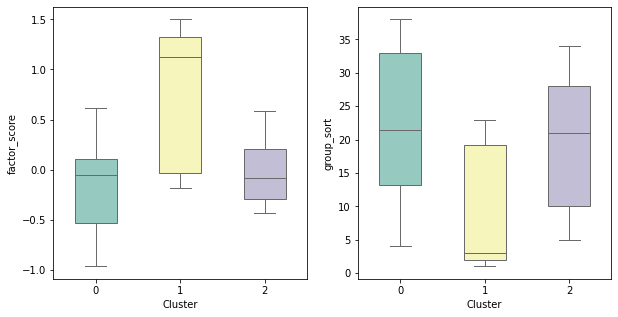

In [ ]:
plt.figure(figsize=(10,5))
#1
plt.subplot(1, 2, 1)
sns.boxplot(x="Cluster", y='factor_score', data=dfmixed, width=0.5, linewidth=1.0, palette="Set3") 
#2
plt.subplot(1, 2, 2)
sns.boxplot(x="Cluster", y='group_sort', data=dfmixed, width=0.5, linewidth=1.0, palette="Set3") 

According to cluster result, we consider their factor scores and rankings.Cluster 1 have the highest ranking.

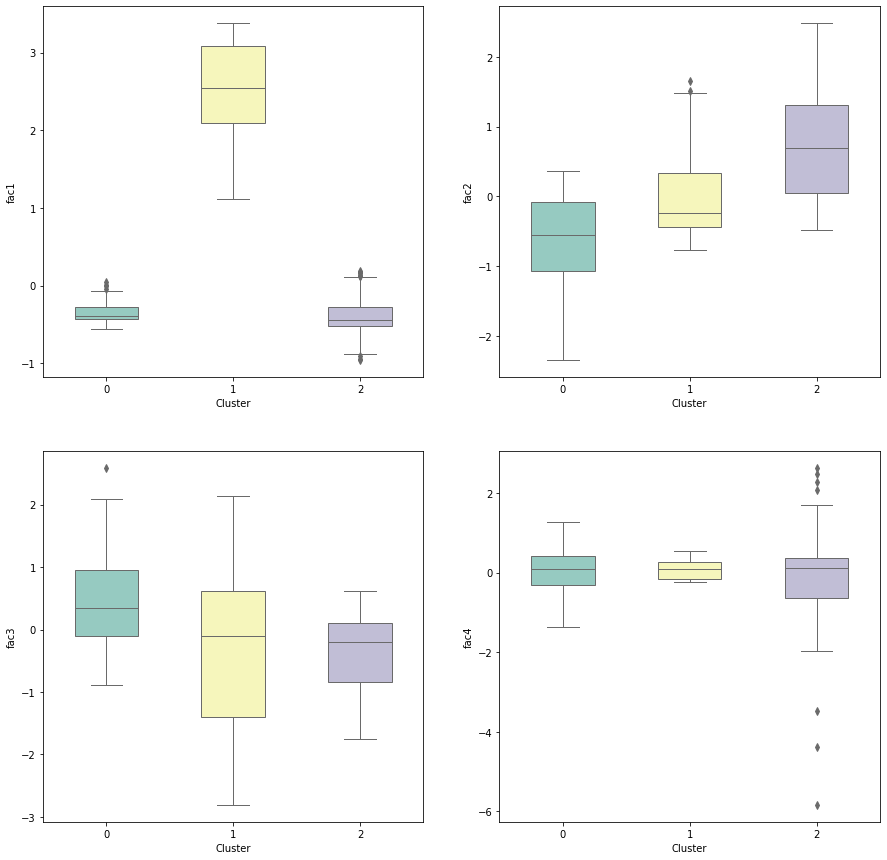

In [ ]:
plt.figure(figsize=(15, 15))
#1
plt.subplot(2, 2, 1)
sns.boxplot(x="Cluster", y='fac1', data=dfmixed, width=0.5, linewidth=1.0, palette="Set3") 
#2
plt.subplot(2, 2, 2)
sns.boxplot(x="Cluster", y='fac2', data=dfmixed, width=0.5, linewidth=1.0, palette="Set3") 
#3
plt.subplot(2, 2, 3)
sns.boxplot(x="Cluster", y='fac3', data=dfmixed, width=0.5, linewidth=1.0, palette="Set3") 

plt.subplot(2, 2, 4)
sns.boxplot(x="Cluster", y='fac4', data=dfmixed, width=0.5, linewidth=1.0, palette="Set3") 
plt.show()

We also consider each factor in each cluster.

### Cluster Map in 2017

In [ ]:
from pyecharts import Map
Performance[Performance['Year'] == 2007]['Cluster'].values*50
Performance['Country']=Performance['Country'].str.replace('Central African Republic','Central African Rep').str.replace('Dominican Republic','Dominican Rep').str.replace('Iran (Islamic Republic of)','Iran').str.replace('Russian Federation','Russia').str.replace('United Republic of Tanzania','Tanzania').str.replace('United States of America','United States').str.replace('Viet Nam','Vietnam')
value =Performance[Performance['Year'] == 2007]['Cluster'].values*50
attr = Performance[Performance['Year'] == 2007]['Country'].values
map0 = Map("Nation", width=1200, height=600)
map0.add("Nation", attr, value, maptype="world",  is_visualmap=True, visual_text_color='#000')

## visulisation of American cities


All above analysises are in national level. We now focus on the data of the USA cities from www.cdp.net. As have mentioned above, the prediction about USA warter shortage situation is on a relatively middle level among all these countries.  Would that of the cities be different to each other, or equally worse? Here we regard 'increased water stress or scarcity' as water stress, 'increased water demand' as water shortage, and visualize theses data.

On the following maps, the size of the dots represent population while the color means magnitude. 

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
df = pd.read_csv('2018_USA_city_water_shortage.csv')

In [ ]:
df['latitude']=df['City.Location'].str[1:-1].map(lambda x:x.split(',')[0])

In [ ]:
df['longitude']=df['City.Location'].str[1:-1].map(lambda x:x.split(',')[1])

In [ ]:
df[['latitude','longitude']] = df[['latitude','longitude']].apply(pd.to_numeric)

In [ ]:
df.head(5)

,??,Organisation,City,Country,Region,Access,C40,Reporting.year,Risks.to.city.s.water.supply,Timescale,Timescale.value,Magnitude,Magnitude.Value,Risk.description,Current.population,Population.year,City.Location,latitude,longitude
0,10495,City of Las Vegas,Las Vegas,United States of America,North America,public,NaN,2018,Declining water quality,Medium-term,3,Serious,2,"As Lake Mead's level declines, there are conce...",648224,2017,"(36.1699, -115.14)",36.1699,-115.1400
1,31090,District of Columbia,"Washington, DC",United States of America,North America,public,C40,2018,Declining water quality,Medium-term,3,Serious,2,The 2010 Washington Metropolitan Area Water Su...,693972,2017,"(38.9072, -77.0369)",38.9072,-77.0369
2,31090,District of Columbia,"Washington, DC",United States of America,North America,public,C40,2018,Declining water quality,Long-term,4,Serious,2,While the Districtâ€™s drinking water supply i...,693972,2017,"(38.9072, -77.0369)",38.9072,-77.0369
3,49335,Metropolitan Government of Nashville and David...,Nashville,United States of America,North America,public,NaN,2018,Declining water quality,Current,1,Less Serious,1,Increasing development and impervious surfaces,667560,2017,"(36.1627, -86.7816)",36.1627,-86.7816
4,31177,Salt Lake City,Salt Lake City,United States of America,North America,public,NaN,2018,Declining water quality,Short-term,2,Serious,2,"More rain, less snow, aging drainage systems, ...",193744,2016,"(40.7608, -111.891)",40.7608,-111.8910


In [ ]:
#px.set_mapbox_access_token(open(".mapbox_token").read())
token='pk.eyJ1Ijoia2VsbHlzaGllaCIsImEiOiJja25yajVzZTYwMXc4MnB0OWcyaDl1OWJ2In0.UXc7Gx1BGp1C_9K14cj9fA'

In [ ]:
map=px.scatter_mapbox(df,
                      lon='longitude',
                      lat='latitude',
                      size='Current.population',
                      color='Magnitude',
                      hover_name='City',
                      hover_data=['City'],
                      size_max=30,
                      color_discrete_sequence=["#636EFA", "#00CC96", "#EF553B"],
                      title="2018 USA Water Shortage Map"
)
map.update_layout(mapbox={'accesstoken':token, 'center':{'lon':-95,'lat':39.7047},'zoom':3.1}
                )

In [ ]:
df1 = pd.read_csv('2018_USA_city_water_stress.csv')

In [ ]:
df1['latitude']=df1['City.Location'].str[1:-1].map(lambda x:x.split(',')[0])

In [ ]:
df1['longitude']=df1['City.Location'].str[1:-1].map(lambda x:x.split(',')[1])

In [ ]:
df1[['latitude','longitude']] = df1[['latitude','longitude']].apply(pd.to_numeric)

In [ ]:
df1.head(5)

,Account.No,Organisation,City,Country,Region,Access,C40,Reporting.year,Risks.to.city.s.water.supply,Timescale,Timescale.Value,Magnitude,Magnitude.Value,Risk.description,Current.population,Population.year,City.Location,latitude,longitude
0,1093,City of Atlanta,Atlanta,United States of America,North America,public,NaN,2018,Increased water stress or scarcity,Short-term,2,Serious,2,The city depends on one river for water supply...,450182,2017,"(33.749, -84.388)",33.7490,-84.3880
1,1184,City of Austin,Austin,United States of America,North America,public,C40,2018,Increased water stress or scarcity,Medium-term,3,Extremely serious,3,NaN,1265974,2017,"(30.2672, -97.7431)",30.2672,-97.7431
2,10495,City of Las Vegas,Las Vegas,United States of America,North America,public,NaN,2018,Increased water stress or scarcity,Current,1,Extremely serious,3,"Lake Mead, which is 90% of Southern Nevada's s...",648224,2017,"(36.1699, -115.14)",36.1699,-115.1400
3,31090,District of Columbia,"Washington, DC",United States of America,North America,public,C40,2018,Increased water stress or scarcity,Medium-term,3,Serious,2,The 2010 Washington Metropolitan Area Water Su...,693972,2017,"(38.9072, -77.0369)",38.9072,-77.0369
4,31177,Salt Lake City,Salt Lake City,United States of America,North America,public,NaN,2018,Increased water stress or scarcity,Short-term,2,Extremely serious,3,Snow pack is a significant water storage resou...,193744,2016,"(40.7608, -111.891)",40.7608,-111.8910


In [ ]:
map1=px.scatter_mapbox(df1,
                      lon='longitude',
                      lat='latitude',
                      size='Current.population',
                      color='Magnitude',
                      hover_name='City',
                      hover_data=['City'],
                      size_max=30,
                      color_discrete_sequence=["#636EFA", "#00CC96", "#EF553B"],
                      title="2018 USA Water Stress Map"
)
map1.update_layout(mapbox={'accesstoken':token, 'center':{'lon':-95,'lat':39.7047},'zoom':3.1}
                )

Most cities are facing serious or extremly serious. For USA, it seems that a water crisis is just around the corner.
And it seems have no correlation between the level of Water Shorage (Water Stress) and the population of that city.

# Conclusion

Our time series results predict future water shortage will deteriorate in most areas. We need to increase the awareness of the existence, severity, causes, consequences, and possible solutions to water crisis. The awareness of water protection not only helps it save, but also creates pressure for other measures.

Based on the various analyses we have conducted above,  each country needs to cherish its own water resources and improve water use efficiency to reduce the water stress. Instance, more efficient industrial and agricultural systems can be researched and developed to improve the effective utilization of agricultural and industrial water. This can increase the proportion of human consumption available.

At the same time, each country can appropriately control population growth to reduce the growth rate of water demand. In the long run, the available drinking water will not be sufficient to meet human needs, so strategies to control population growth are crucial.

It is hoped that as the whole world pays attention to the existence of the water crisis, the water shortage and water stress problems of various countries can be improved to a certain extent in the future.